**Introduction**

In this analysis, we are going to classify  bank's account balance using various attributes in the dataset, and utilizing three methods:

+ Logistic Regression
+Linear Discriminat Ananlysis (LDA), and
+Quadratic Discriminat Analysis (QDA)

First, let's upload the dataset and look at it.

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload csv file using colab
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [ ]:
# Loading the Credit data using Pandas
df = pd.read_csv('Credit.csv')

In [ ]:
# checking the first five rows of data
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


The above table in which the first 5 rows of the data is shown depicts that the dataset includes some information associated with bank's accounts both quantitative and qualititative types. More descriptive data on quantitative part is shown as follow:

In [ ]:
#explore data
df.describe(percentiles=[.99])

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
99%,163.499500,11592.770000,817.110000,7.000000,87.000000,19.000000,1677.100000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


For the objective of the current analysis, the qualititative data will be removed.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape

(400, 12)

Now, the data includes 400 records with 11 attributes. As the aim of the analysis is building a classification model on balance feature, more precisely, classified data into accounts with less than 1500 or more than 1500 balance, a new binary feature will be created as follow:

In [ ]:
# Create a new binary feature for balance shown whether it is more than 1500 or not
df['Balance_1500'] = np.where(df['Balance'] > 1500, 1, 0)

In [ ]:
df.drop('Balance', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Income        400 non-null    float64
 1   Limit         400 non-null    int64  
 2   Rating        400 non-null    int64  
 3   Cards         400 non-null    int64  
 4   Age           400 non-null    int64  
 5   Education     400 non-null    int64  
 6   Own_Yes       400 non-null    bool   
 7   Student_Yes   400 non-null    bool   
 8   Married_Yes   400 non-null    bool   
 9   Region_South  400 non-null    bool   
 10  Region_West   400 non-null    bool   
 11  Balance_1500  400 non-null    int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 24.0 KB


A correlation heatmap can show the relationship among all features and give a better picture to understand how they relate to each other.

<Axes: >

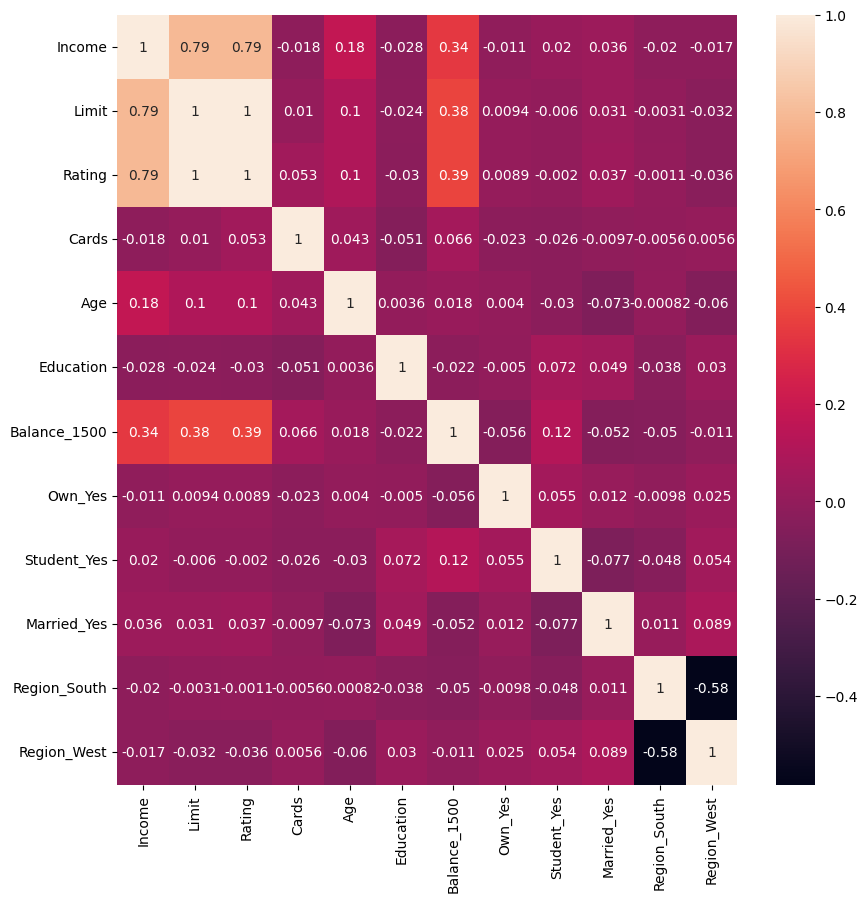

In [ ]:
# Plot a correlation map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In the heatmap plot, it can be seen that some features have high correlation by which PCA would be a appropriate method to solve this issue but that is not the case for this analysis.

In [ ]:
# Check the balance in the target data
df['Balance_1500'].value_counts()

,count
Balance_1500,
0,391
1,9


It can be clearly seen that target data is imbalance hence using accuracy as a metric should be considered with the caveat.

In [ ]:
# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [ ]:
# define independent and target variables
X = df.drop('Balance_1500', axis=1)
y = df['Balance_1500']

In [ ]:
# Fit logistic regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [ ]:
# Fit linear discriminat analysis to the data
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
# Fit quadratric discriminant analysis to data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
# import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In the following confusion matrix using three models is calculated.

In [ ]:
# confusion matrix for the logreg model
y_pred_lr = lr.predict(X)
conf_m = confusion_matrix(y, y_pred_lr)
print(conf_m)

[[390   1]
 [  4   5]]


In [ ]:
# confusion matrix for LDA model
y_pred_lda = lda.predict(X)
conf_m = confusion_matrix(y, y_pred_lda)
print(conf_m)

[[386   5]
 [  2   7]]


In [ ]:
# confusion matrix for QDA model
y_pred_qda = qda.predict(X)
conf_m = confusion_matrix(y, y_pred_qda)
print(conf_m)

[[391   0]
 [  3   6]]


It can be seen that although matrices shows records are classified closely, LDA model does not perform as well as the others where QDA outperforms other models.

The accuracy for each model is calculated as follow. Even though it is an inappropriate metric for this analysis, where there is class imbalanced, again in the case of accuracy, the QDA model outperforms others.

In [ ]:
# classificaiton reports
print('classificaiton report for logistic regeression')
print(classification_report(y, y_pred_lr))
print('----------------------------------------------')
print('classificaiton report for LDA')
print(classification_report(y, y_pred_lda))
print('----------------------------------------------')
print('classificaiton report for QDA')
print(classification_report(y, y_pred_qda))

classificaiton report for logistic regeression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       391
           1       0.83      0.56      0.67         9

    accuracy                           0.99       400
   macro avg       0.91      0.78      0.83       400
weighted avg       0.99      0.99      0.99       400

----------------------------------------------
classificaiton report for LDA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       391
           1       0.58      0.78      0.67         9

    accuracy                           0.98       400
   macro avg       0.79      0.88      0.83       400
weighted avg       0.99      0.98      0.98       400

----------------------------------------------
classificaiton report for QDA
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       391
           1       1.00      0.67   

Another metric that is worth to consider would be AUC shown for each model in the following sections although it is also not an appropriate for imbalanced classificaiton.

One point that could be considerable is that while logistic regression was better in both confusion matrix and accuracy compare to LDA, it has lower AUC score than LDA.

In [ ]:
# AUC for logreg
auc = roc_auc_score(y, y_pred_lr)
print("AUC_logreg: %.2f%%" % (auc * 100.0))

AUC_logreg: 77.65%


In [ ]:
# AUC for LDA
auc = roc_auc_score(y, y_pred_lda)
print("AUC_lda: %.2f%%" % (auc * 100.0))

AUC_lda: 88.25%


In [ ]:
# AUC for QDA
auc = roc_auc_score(y, y_pred_qda)
print("AUC_qda: %.2f%%" % (auc * 100.0))

AUC_qda: 83.33%


In [ ]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify=y)

In [ ]:
# fit logistic regression, LDA, and QDA to train data and evaluate on test data
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
# fit LDA model to train data and evaluate on test data
print('classificaiton report for logistic regeression')
print(classification_report(y_test, y_pred_lr))
print('----------------------------------------------')
print('classificaiton report for LDA')
print(classification_report(y_test, y_pred_lda))
print('----------------------------------------------')
print('classificaiton report for QDA')
print(classification_report(y_test, y_pred_qda))

classificaiton report for logistic regeression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       117
           1       1.00      0.33      0.50         3

    accuracy                           0.98       120
   macro avg       0.99      0.67      0.75       120
weighted avg       0.98      0.98      0.98       120

----------------------------------------------
classificaiton report for LDA
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       117
           1       0.50      0.67      0.57         3

    accuracy                           0.97       120
   macro avg       0.75      0.82      0.78       120
weighted avg       0.98      0.97      0.98       120

----------------------------------------------
classificaiton report for QDA
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       117
           1       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# calcualte roc auc for logistic regression
auc = roc_auc_score(y_test, y_pred_lr)
print("AUC_logreg: %.2f%%" % (auc * 100.0))

AUC_logreg: 66.67%


In [ ]:
#calculate roc auc for LDA
auc = roc_auc_score(y_test, y_pred_lda)
print('AUC_LDA: %.2f%%' % (auc * 100))

AUC_LDA: 82.48%


In [ ]:
#calculate roc auc for QDA
auc = roc_auc_score(y_test, y_pred_qda)
print('AUC_QDA: %.2f%%' % (auc * 100))

AUC_QDA: 50.00%


In [ ]:
# scale data before projecting model
from sklearn.preprocessing import StandardScaler
scal

In a nutshell, it seems that in this case that has been analyzed, LDA shows better performance so could be better model considering F_score macro average and AUC scores.